In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,SGDRegressor,ElasticNet,Lars,Lasso,OrthogonalMatchingPursuit
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import metrics
import matplotlib. pyplot as plt
import math

## Exploremos que modelo(s) utilizar
**Vamos a proceder a comparar el resultado de algunos modelos lineales y no lineales.**

In [2]:
dataset_train = pd.read_csv('../1.Limpieza_dataraw_inicial/Data_output/train_clean.csv', index_col=0)
dataset_train

,carat,cut,color,clarity,depth,table,price
0,1.12,5,3,3,61.6,59.0,5363
1,1.14,3,6,2,60.0,54.0,5593
2,0.90,3,7,2,60.3,63.0,3534
3,0.71,4,6,5,61.9,54.0,3212
4,0.34,3,5,2,60.0,62.0,447
...,...,...,...,...,...,...,...
40450,0.90,2,7,3,63.8,58.0,4120
40451,0.35,4,7,7,62.0,54.0,1266
40452,0.90,2,4,2,58.4,55.0,3269
40453,1.21,2,3,3,63.6,56.0,5893


Dividimos el dataset en dos bloques,de  entrenamiento(las columnas que no son price) y validación (la columna price) del modelo.(Train_test_split)

In [3]:
X_train, X_test, y_train, y_test  = train_test_split(dataset_train.drop(columns="price"),dataset_train.price, test_size=0.2)
train_split=[X_train, X_test, y_train, y_test ]

## Comencemos por probar modelos lineales


In [24]:
lineral_models = {
          "LinearRegression":LinearRegression(),
          "Ridge":Ridge(),
          "SGDRegressor":SGDRegressor(),
          "ElasticNet":ElasticNet(),
          "Lars":Lars(),
          "Lasso":Lasso(),
          "OrthogonalMatchingPursuit":OrthogonalMatchingPursuit()
         }

Entrenamos el modelo

In [25]:
for name, model in lineral_models.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)

Training LinearRegression
Training Ridge
Training SGDRegressor
Training ElasticNet
Training Lars
Training Lasso
Training OrthogonalMatchingPursuit


Hacemos el testeo tambien para todas con el fin de predecir todos lo smodelos lineales d euna,hallar y analizar los R-cuadrado y Errores cuadráticos.
Para poder llevarnos todos esos datos a un diccionario , que nos permitira pasar a dataframe los datos y plotear con facilidad todos en un paso.

Analizamos el R-cuadrado y Error cuadrático.

- R2: Va de 0 a 1, con 0 indicando que el modelo propuesto no mejora la predicción sobre el modelo medio y 1 indica una predicción perfecta 

- RMSE:Los valores más bajos de RMSE indican un mejor ajuste.

In [41]:
def modelPredict(models, X_train, y_train, X_test, y_test):
    results = dict()
    for modelName, model in models.items():
        y_pred = model.predict(X_test)
        results[modelName] = y_pred
        r2 = r2_score(y_test, y_pred)
        print(f"{modelName}: r2 score = {round(r2, 4)}")
        mse = mean_squared_error(y_test, y_pred)
        rmse = math.sqrt(mse)
        print(f"{modelName}: rmse = {round(rmse, 4)}")
    return results

In [42]:
y_predicts = modelPredict(lineral_models,X_train, y_train, X_test, y_test)

LinearRegression: r2 score = 0.9059
LinearRegression: rmse = 1224.4626
Ridge: r2 score = 0.9059
Ridge: rmse = 1224.459
SGDRegressor: r2 score = -94875740.9662
SGDRegressor: rmse = 38872005.0925
ElasticNet: r2 score = 0.4468
ElasticNet: rmse = 2968.1184
Lars: r2 score = 0.9059
Lars: rmse = 1224.4626
Lasso: r2 score = 0.9059
Lasso: rmse = 1224.4414
OrthogonalMatchingPursuit: r2 score = 0.8526
OrthogonalMatchingPursuit: rmse = 1532.1661


In [44]:
results = pd.DataFrame(y_predicts)
results["y_test"] = y_test.values
pd.DataFrame(results)

Text(0.5, 0, 'RMSE: 1532.1661,r2 score = 0.8526')

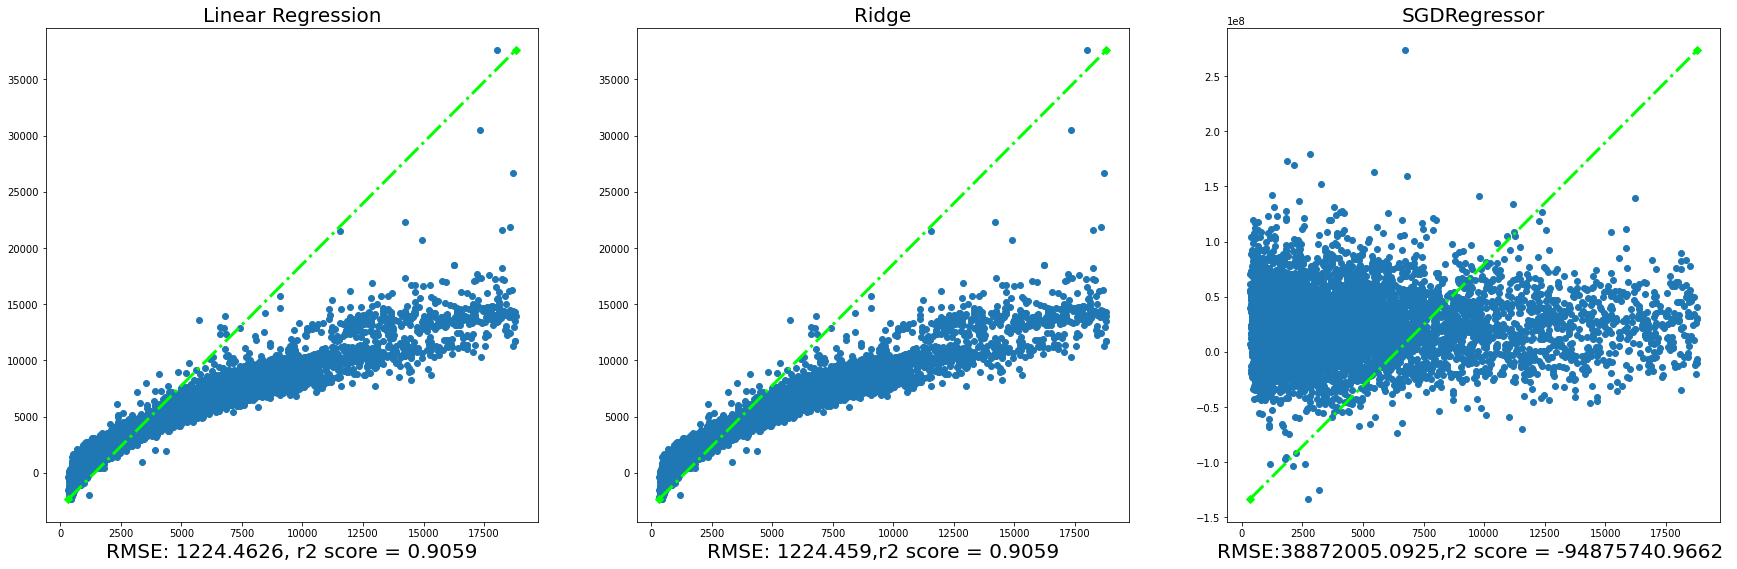

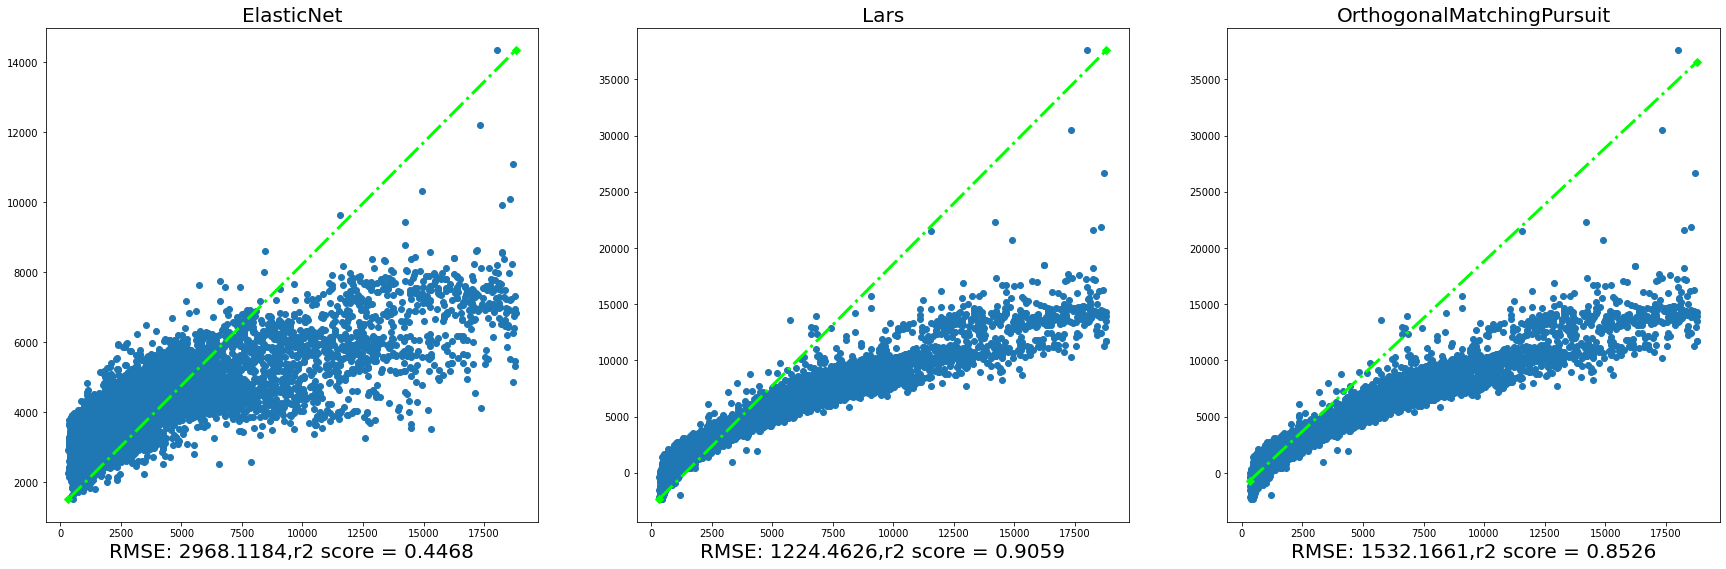

In [49]:
figures_alph_num = plt.figure(figsize=(30,20))
plt.subplot(2,3,1)
plt.scatter(y_test,results['LinearRegression'])
plt.plot([y_test.min(), y_test.max()], [results['LinearRegression'].min(), results['LinearRegression'].max()], 'D-.',color='lime', lw=3)
plt.title('Linear Regression', fontsize=20)
plt.xlabel('RMSE: 1224.4626, r2 score = 0.9059', fontsize=20)

plt.subplot(2,3,2)
plt.scatter(y_test,results['Ridge'])
plt.plot([y_test.min(), y_test.max()], [results['Ridge'].min(), results['Ridge'].max()], 'D-.',color='lime', lw=3)
plt.title('Ridge', fontsize=20)
plt.xlabel('RMSE: 1224.459,r2 score = 0.9059', fontsize=20)

plt.subplot(2,3,3)
plt.scatter(y_test,results['SGDRegressor'])
plt.plot([y_test.min(), y_test.max()], [results['SGDRegressor'].min(), results['SGDRegressor'].max()], 'D-.',color='lime', lw=3)
plt.title('SGDRegressor', fontsize=20)
plt.xlabel('RMSE:38872005.0925,r2 score = -94875740.9662 ', fontsize=20)

figures_alph_num = plt.figure(figsize=(30,20))
plt.subplot(2,3,4)
plt.scatter(y_test,results['ElasticNet'])
plt.plot([y_test.min(), y_test.max()], [results['ElasticNet'].min(), results['ElasticNet'].max()], 'D-.',color='lime', lw=3)
plt.title('ElasticNet', fontsize=20)
plt.xlabel('RMSE: 2968.1184,r2 score = 0.4468', fontsize=20)

plt.subplot(2,3,5)
plt.scatter(y_test,results['Lars'])
plt.plot([y_test.min(), y_test.max()], [results['Lars'].min(), results['Lars'].max()], 'D-.',color='lime', lw=3)
plt.title('Lars', fontsize=20)
plt.xlabel('RMSE: 1224.4626,r2 score = 0.9059', fontsize=20)

plt.subplot(2,3,6)
plt.scatter(y_test,results['Lasso'])
plt.plot([y_test.min(), y_test.max()], [results['OrthogonalMatchingPursuit'].min(), results['OrthogonalMatchingPursuit'].max()], 'D-.',color='lime', lw=3)
plt.title('OrthogonalMatchingPursuit', fontsize=20)
plt.xlabel('RMSE: 1532.1661,r2 score = 0.8526', fontsize=20)

In [32]:
results = dict()
for name, model in lineral_models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("r2 score",round(r2_score(y_test, y_pred),4))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),4)
    #vamos a pasarlo a diccionario para meterlo todo en un df, que nos facilitara el ploteo
    results[name] = y_pred

-------LinearRegression-------
r2 score 0.9059
RMSE: 1224.0 4
-------Ridge-------
r2 score 0.9059
RMSE: 1224.0 4
-------SGDRegressor-------
r2 score -94875740.9662
RMSE: 38872005.0 4
-------ElasticNet-------
r2 score 0.4468
RMSE: 2968.0 4
-------Lars-------
r2 score 0.9059
RMSE: 1224.0 4
-------Lasso-------
r2 score 0.9059
RMSE: 1224.0 4
-------OrthogonalMatchingPursuit-------
r2 score 0.8526
RMSE: 1532.0 4


In [35]:
pd.DataFrame(results)

,OrthogonalMatchingPursuit
0,14101.504083
1,159.186505
2,6200.857455
3,933.759704
4,856.302384
...,...
8086,1785.790222
8087,159.186505
8088,4729.168378
8089,-383.014734


## Probemos ahora con los modelos no lineales

In [ ]:
models_non_linear={
    "ExtraTreesRegressor":ExtraTreesRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
    }

In [ ]:
for name, model in models_non_linear.items():
    print(f"Training {name}")
    model.fit(X_train,y_train)

In [ ]:
for name, model in models_non_linear.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("r2 score",round(r2_score(y_test, y_pred),4))
    print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),4)

In [ ]:
results = pd.DataFrame(y_pred)
results["y_test"] = y_test.values

In [ ]:

import matplotlib. pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

Como podemos observar el error cuadratico medio entre nuestro grounthtruth (precio)y la prediccion es muchsimo menor para los modelos no lineales seleccionados.
El R2, tambien aporta metricas ganadoras más proximas al 1.

## Grid Search y Cross Validation

**Escogemos múltiples combinaciones de ajustes de parámetros, y cada uno de ellos los entrenamos de forma cruzada para determinar cuál da el mejor rendimiento.**

**En nuestro caso queremos encontrar los mejores parametros para ExtraTreesRegressor,GradientBoostingRegressor, RandomForestRegressor**

Escogemos los parametros. Cada modelo acepta unos parametros diferentes. Por ej bootstrap no esta en GradientBoostingRegressor, por lo que selecionaremos otros parametros para este modelo.

In [4]:
#explicacion parametros: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
parameters = { 
                'bootstrap': [True, False],  #explicacion bootstrap:https://stackoverflow.com/questions/54529928/does-bootstrap-features-parameter-is-useful-if-i-use-max-features-parameter-in-r
                'n_estimators': [100,200, 300],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [20,40,60]
                }

parameters_GBR={ 
                'n_estimators': [100,200, 300],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [20,40,60]
                }
#rfc=GradientBoostingRegressor()
#sorted(rfc.get_params().keys())-----Esto es para saber los parametros disponibles por modelo

Hacemos el Cross Validation para los tres modelos y ploteamos como varia el modelo con cada parametro **VER EN LA CARPETA DE PLOTEADOS,archivo Plots_cambios_parametros**

In [ ]:

#GS para RandomForestRegressor
rfc = RandomForestRegressor()
grid_RandomForestRegressor = GridSearchCV(estimator=rfc,param_grid=parameters,verbose=1,n_jobs=-1,cv=5,return_train_score=True)
grid_RandomForestRegressor.fit(X_train,y_train)


In [ ]:
#GS para GradientBoostingRegressor
rfc = GradientBoostingRegressor()
grid_GradientBoostingRegressor = GridSearchCV(estimator=rfc,param_grid=parameters_GBR,verbose=1,n_jobs=-1,cv=5,return_train_score=True)
grid_GradientBoostingRegressor.fit(X_train,y_train)

In [ ]:
#GS para GradientBoostingRegressor
rfc = GradientBoostingRegressor()
grid_GradientBoostingRegressor = GridSearchCV(estimator=rfc,param_grid=parameters_GBR,verbose=1,n_jobs=-1,cv=5,return_train_score=True)
grid_GradientBoostingRegressor.fit(X_train,y_train)

¿Que parametros han resultado mejores para cada modelo?

In [ ]:
print('El mejor parámetro para RandomForestRegressor es:',grid_RandomForestRegressor.best_params_)
print('El mejor parámetro para GradientBoostingRegressor es:',grid_GradientBoostingRegressor.best_params_)
print('El mejor parámetro para ExtraTreesRegressor es:',grid_ExtraTreesRegressor.best_params_)

Volvemos a entrenar los modelos pero ahora con los parametros ganadores

In [12]:
#Entrenando con el mejor parámetro RandomForestRegressor

model_RandomForestRegressor = RandomForestRegressor(bootstrap=True, max_depth=60, max_features= 'auto', n_estimators= 200)
model_RandomForestRegressor.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"-------'RandomForestRegressor'-------")
print("r2 score",round(r2_score(y_test, y_pred),4))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),4)

-------'RandomForestRegressor'-------
r2 score 0.9958
RMSE: 258.0 4


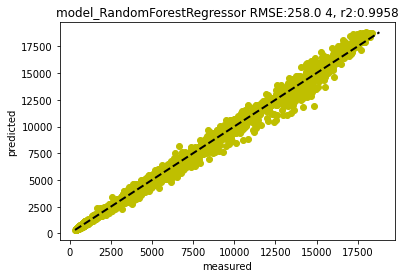

In [16]:

plt.scatter(y_pred,y_test,c='y')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2,)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("model_RandomForestRegressor RMSE:258.0 4, r2:0.9958" )
plt.show()

In [17]:
#Entrenando con el mejor parámetro GradientBoostingRegressor
model_GradientBoostingRegressor = GradientBoostingRegressor(max_depth= 60, max_features= 'log2', n_estimators= 300)
model_GradientBoostingRegressor.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"-------'GradientBoostingRegressor'-------")
print("r2 score",round(r2_score(y_test, y_pred),4))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),4)

-------'GradientBoostingRegressor'-------
r2 score 0.9958
RMSE: 258.0 4


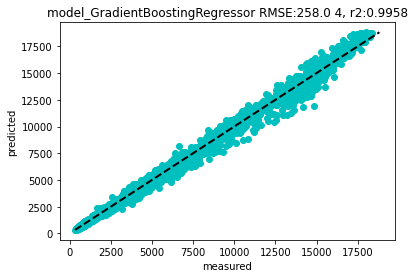

In [19]:

plt.scatter(y_pred,y_test,c='c')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2,)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("model_GradientBoostingRegressor RMSE:258.0 4, r2:0.9958" )
plt.show()

In [20]:
#Entrenando con el mejor parámetro ExtraTreesRegressor
model_ExtraTreesRegressor = ExtraTreesRegressor(bootstrap= True, max_depth= 20, max_features= 'auto', n_estimators= 300)
model_ExtraTreesRegressor.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"-------'ExtraTreesRegressor'-------")
print("r2 score",round(r2_score(y_test, y_pred),4))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),4)


-------'ExtraTreesRegressor'-------
r2 score 0.9958
RMSE: 258.0 4


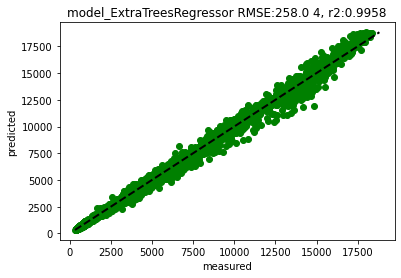

In [22]:

plt.scatter(y_pred,y_test,c='g')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2,)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("model_ExtraTreesRegressor RMSE:258.0 4, r2:0.9958" )
plt.show()

¿Ha habido mejora con el Grid Search y Cross Validation?

In [ ]:
Data={
        'r2_score_antesGV':[0.9796,0.9758, 0.9813],
        'r2_score_despuesGv':[0.9813,0.9813,0.9813],
        'RMSE_score_antesGV':[575.04,626.04,551.04],
        'RMSE_score_despuesGv':[551.04,551.04,551.04],
        
    }
comparacion=pd.DataFrame(Data,index=['ExtraTreesRegressor','GradientBoostingRegressor','RandomForestRegressor']).T
comparacion

Casi impredecible,en el **r2** mejora de los dos primeros ,y  el tercero nada no varia.
En **RMSE** , mejora en el primero , empeora en el segundo y tampoco varía aqui el tercero.


# Elegiremos entonces ExtraTreesRegresor con GV y RandomForestRegressor para la primera predicción

In [9]:
dataset_predict= pd.read_csv('../1.Limpieza_dataraw_inicial/Data_output/predict_clean.csv', index_col=0)
dataset_predict

,carat,cut,color,clarity,depth,table
0,0.33,3,2,8,62.0,58.0
1,1.21,3,7,2,62.4,58.0
2,1.06,3,7,3,59.3,60.0
3,0.36,4,6,7,61.4,57.0
4,0.70,4,6,5,62.3,54.0
...,...,...,...,...,...,...
13480,2.04,2,7,3,61.9,60.0
13481,0.31,4,4,8,61.7,55.0
13482,0.52,4,7,6,62.0,56.0
13483,0.50,5,5,3,59.1,58.0


## Hacemos la prediccion para ambos modelos

Creamos la muestra de entrenamiento y de test, tanto para predictores como para la variable objetivo

In [4]:
X = dataset_train.drop(columns=["price"])
Y = dataset_train["price"]
#TESTEAREMOS EL DATASET DE PRED QUE NO TIENE PRICE

Elegimos el modelo a entrenar con los parametros ganadores, en este caso el Random Forest

In [5]:

model =RandomForestRegressor(bootstrap=True, max_depth=60, max_features= 'auto', n_estimators= 200)

Construimos el modelo sobre los datos de entrenamiento y lo entrenamos

In [6]:
fitted_model = model.fit(X, Y)

Predecimos para los valores del dataset de predict

In [35]:
y_pred_final_1 = fitted_model.predict(dataset_predict)
y_pred_final_1

array([ 747.12316667, 6001.735     , 5875.42541667, ..., 2417.46125   ,
       1309.21066667, 1091.55      ])

Hacemos ahora la prediccion para ExtraTreesRegressor

In [10]:
X = dataset_train.drop(columns=["price"])
Y = dataset_train["price"]
model=ExtraTreesRegressor(bootstrap= True, max_depth= 20, max_features= 'auto', n_estimators= 300)
fitted_model = model.fit(X, Y)
y_pred_final_2 = fitted_model.predict(dataset_predict)
y_pred_final_2

array([ 740.28420837, 6146.329891  , 5859.85886649, ..., 2465.92128708,
       1309.64826607, 1063.91644878])

In [11]:
plt.scatter(y_pred_final_2,y_test,c='y')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2,)
plt.xlabel('measured')
plt.ylabel('predicted')
plt.title("ExtraTreesRegressor RMSE:533.5037" )
plt.show()

NameError: name 'plt' is not defined

Pasamos ambas predicciones a datframe con el formato que debe tener la submission y lo guardamos

In [37]:
pred_1 = pd.DataFrame(y_pred_final_1).reset_index()
pred_1 = pred.rename(columns={"index": "id", 0: "price"})
pred_1.head()


,id,price
0,0,755.954083
1,1,6122.865000
2,2,5918.303333
3,3,1084.177000
4,4,3242.288750


In [38]:
pred_2 = pd.DataFrame(y_pred_final_2).reset_index()
pred_2 = pred.rename(columns={"index": "id", 0: "price"})
pred_2.head()


,id,price
0,0,755.954083
1,1,6122.865000
2,2,5918.303333
3,3,1084.177000
4,4,3242.288750


Guardamos ambas summission

In [40]:
pred_1.to_csv('../1.Limpieza_dataraw_inicial/Data_output/predict_Random_forest.csv', header= True, index=False)
pred_2.to_csv('../1.Limpieza_dataraw_inicial/Data_output/predict_Extra_trees.csv', header= True, index=False)